# Partition Function Calculation in Statistical Mechanics

## Introduction

The **partition function** is the cornerstone of statistical mechanics, serving as the bridge between microscopic quantum states and macroscopic thermodynamic observables. Named from the German *Zustandssumme* ("sum over states"), it encodes all thermodynamic information about a system in thermal equilibrium.

## Theoretical Foundation

### The Canonical Partition Function

For a system in thermal equilibrium with a heat reservoir at temperature $T$, the **canonical partition function** is defined as:

$$Z = \sum_{i} e^{-\beta E_i}$$

where:
- $E_i$ is the energy of microstate $i$
- $\beta = \frac{1}{k_B T}$ is the inverse temperature
- $k_B$ is Boltzmann's constant

For continuous energy spectra, the sum becomes an integral:

$$Z = \int g(E) e^{-\beta E} \, dE$$

where $g(E)$ is the density of states.

### Probability of Microstates

The probability of finding the system in microstate $i$ follows the **Boltzmann distribution**:

$$P_i = \frac{e^{-\beta E_i}}{Z}$$

This ensures normalization: $\sum_i P_i = 1$.

### Connection to Thermodynamics

The partition function connects to the **Helmholtz free energy**:

$$F = -k_B T \ln Z$$

From this, all thermodynamic quantities can be derived:

**Average Energy:**
$$\langle E \rangle = -\frac{\partial \ln Z}{\partial \beta} = k_B T^2 \frac{\partial \ln Z}{\partial T}$$

**Entropy:**
$$S = k_B \left( \ln Z + \beta \langle E \rangle \right) = -\frac{\partial F}{\partial T}$$

**Heat Capacity:**
$$C_V = \frac{\partial \langle E \rangle}{\partial T} = k_B \beta^2 \left( \langle E^2 \rangle - \langle E \rangle^2 \right)$$

## Example 1: Two-Level System

The simplest non-trivial system consists of two energy levels: a ground state at $E_0 = 0$ and an excited state at $E_1 = \varepsilon$.

### Partition Function

$$Z_{\text{two-level}} = e^{-\beta \cdot 0} + e^{-\beta \varepsilon} = 1 + e^{-\beta \varepsilon}$$

### Average Energy

$$\langle E \rangle = \frac{\varepsilon \cdot e^{-\beta \varepsilon}}{1 + e^{-\beta \varepsilon}} = \frac{\varepsilon}{1 + e^{\beta \varepsilon}}$$

### Limiting Behavior

- **Low temperature** ($\beta \varepsilon \gg 1$): $\langle E \rangle \to 0$ (system frozen in ground state)
- **High temperature** ($\beta \varepsilon \ll 1$): $\langle E \rangle \to \varepsilon/2$ (equal population)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants

# Set plotting style
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['legend.fontsize'] = 11

# Two-level system implementation
def two_level_partition_function(beta, epsilon):
    """Calculate partition function for a two-level system."""
    return 1 + np.exp(-beta * epsilon)

def two_level_average_energy(beta, epsilon):
    """Calculate average energy for a two-level system."""
    return epsilon / (1 + np.exp(beta * epsilon))

def two_level_heat_capacity(beta, epsilon):
    """Calculate heat capacity for a two-level system (Schottky anomaly)."""
    x = beta * epsilon
    return (x**2 * np.exp(x)) / (1 + np.exp(x))**2

# Generate temperature range (in units where k_B = 1)
epsilon = 1.0  # Energy gap
T = np.linspace(0.01, 5, 500)  # Temperature in units of epsilon/k_B
beta = 1 / T

# Calculate thermodynamic quantities
Z_two = two_level_partition_function(beta, epsilon)
E_two = two_level_average_energy(beta, epsilon)
C_two = two_level_heat_capacity(beta, epsilon)

print("Two-Level System Analysis")
print("="*40)
print(f"Energy gap: ε = {epsilon}")
print(f"Temperature range: T ∈ [{T[0]:.2f}, {T[-1]:.2f}]")
print(f"\nAt T = 0.5ε/k_B: Z = {two_level_partition_function(2, epsilon):.4f}")
print(f"At T = 1.0ε/k_B: Z = {two_level_partition_function(1, epsilon):.4f}")
print(f"At T = 2.0ε/k_B: Z = {two_level_partition_function(0.5, epsilon):.4f}")

Two-Level System Analysis
Energy gap: ε = 1.0
Temperature range: T ∈ [0.01, 5.00]

At T = 0.5ε/k_B: Z = 1.1353
At T = 1.0ε/k_B: Z = 1.3679
At T = 2.0ε/k_B: Z = 1.6065


## Example 2: Quantum Harmonic Oscillator

The quantum harmonic oscillator has evenly spaced energy levels:

$$E_n = \hbar\omega\left(n + \frac{1}{2}\right), \quad n = 0, 1, 2, \ldots$$

### Partition Function

$$Z_{\text{QHO}} = \sum_{n=0}^{\infty} e^{-\beta\hbar\omega(n+1/2)} = e^{-\beta\hbar\omega/2} \sum_{n=0}^{\infty} e^{-n\beta\hbar\omega}$$

Using the geometric series $\sum_{n=0}^{\infty} x^n = \frac{1}{1-x}$ for $|x| < 1$:

$$Z_{\text{QHO}} = \frac{e^{-\beta\hbar\omega/2}}{1 - e^{-\beta\hbar\omega}} = \frac{1}{2\sinh(\beta\hbar\omega/2)}$$

### Average Energy

$$\langle E \rangle = \hbar\omega\left(\frac{1}{2} + \frac{1}{e^{\beta\hbar\omega} - 1}\right) = \hbar\omega\left(\frac{1}{2} + \bar{n}\right)$$

where $\bar{n} = \frac{1}{e^{\beta\hbar\omega} - 1}$ is the **Bose-Einstein distribution** (average occupation number).

In [2]:
def qho_partition_function(beta, hbar_omega):
    """Quantum harmonic oscillator partition function."""
    return 1 / (2 * np.sinh(beta * hbar_omega / 2))

def qho_average_energy(beta, hbar_omega):
    """Average energy of quantum harmonic oscillator."""
    return hbar_omega * (0.5 + 1 / (np.exp(beta * hbar_omega) - 1))

def qho_heat_capacity(beta, hbar_omega):
    """Heat capacity of quantum harmonic oscillator (Einstein model)."""
    x = beta * hbar_omega
    return (x**2 * np.exp(x)) / (np.exp(x) - 1)**2

def classical_ho_energy(T):
    """Classical harmonic oscillator energy (equipartition theorem)."""
    return T  # In units where k_B = 1

# Parameters
hbar_omega = 1.0  # Characteristic energy
T_qho = np.linspace(0.01, 5, 500)
beta_qho = 1 / T_qho

# Calculate quantities
Z_qho = qho_partition_function(beta_qho, hbar_omega)
E_qho = qho_average_energy(beta_qho, hbar_omega)
C_qho = qho_heat_capacity(beta_qho, hbar_omega)
E_classical = classical_ho_energy(T_qho)

print("Quantum Harmonic Oscillator Analysis")
print("="*40)
print(f"Characteristic energy: ℏω = {hbar_omega}")
print(f"\nZero-point energy: E₀ = ℏω/2 = {hbar_omega/2}")
print(f"\nAt T = 0.1ℏω/k_B: ⟨E⟩ = {qho_average_energy(10, hbar_omega):.4f}")
print(f"At T = 1.0ℏω/k_B: ⟨E⟩ = {qho_average_energy(1, hbar_omega):.4f}")
print(f"At T = 10ℏω/k_B: ⟨E⟩ = {qho_average_energy(0.1, hbar_omega):.4f}")

Quantum Harmonic Oscillator Analysis
Characteristic energy: ℏω = 1.0

Zero-point energy: E₀ = ℏω/2 = 0.5

At T = 0.1ℏω/k_B: ⟨E⟩ = 0.5000
At T = 1.0ℏω/k_B: ⟨E⟩ = 1.0820
At T = 10ℏω/k_B: ⟨E⟩ = 10.0083


## Example 3: Ideal Gas (Classical)

For an ideal gas of $N$ non-interacting particles in volume $V$, the single-particle partition function is:

$$z_1 = \frac{V}{\lambda_{th}^3}$$

where $\lambda_{th} = \sqrt{\frac{2\pi\hbar^2}{mk_BT}}$ is the **thermal de Broglie wavelength**.

### N-Particle Partition Function

For indistinguishable particles:

$$Z_N = \frac{z_1^N}{N!} = \frac{1}{N!}\left(\frac{V}{\lambda_{th}^3}\right)^N$$

### Free Energy and Equation of State

Using Stirling's approximation ($\ln N! \approx N\ln N - N$):

$$F = -k_BT\ln Z_N = Nk_BT\left[\ln\left(\frac{N\lambda_{th}^3}{V}\right) - 1\right]$$

The pressure follows from $P = -\left(\frac{\partial F}{\partial V}\right)_T$:

$$PV = Nk_BT$$

This recovers the **ideal gas law**!

In [3]:
def thermal_wavelength(T, mass):
    """
    Calculate thermal de Broglie wavelength.
    Uses SI units: T in Kelvin, mass in kg.
    """
    hbar = constants.hbar
    k_B = constants.k
    return np.sqrt(2 * np.pi * hbar**2 / (mass * k_B * T))

def ideal_gas_partition_function(N, V, T, mass):
    """Single-particle partition function for ideal gas."""
    lambda_th = thermal_wavelength(T, mass)
    z1 = V / lambda_th**3
    return z1  # Return single-particle Z

def ideal_gas_free_energy(N, V, T, mass):
    """Helmholtz free energy for ideal gas (per particle, in units of k_B*T)."""
    lambda_th = thermal_wavelength(T, mass)
    n = N / V  # Number density
    return np.log(n * lambda_th**3) - 1

# Example: Helium gas
m_He = 4 * constants.atomic_mass  # Helium-4 mass
N = constants.Avogadro  # 1 mole
V = 22.4e-3  # 22.4 liters in m³ (STP molar volume)

T_range = np.linspace(100, 1000, 100)  # Kelvin
lambda_He = thermal_wavelength(T_range, m_He)

print("Ideal Gas (Helium) Analysis")
print("="*40)
print(f"Particle mass: m = {m_He:.4e} kg")
print(f"\nThermal de Broglie wavelength:")
print(f"  At T = 300 K: λ_th = {thermal_wavelength(300, m_He)*1e9:.4f} nm")
print(f"  At T = 100 K: λ_th = {thermal_wavelength(100, m_He)*1e9:.4f} nm")
print(f"  At T = 4 K:   λ_th = {thermal_wavelength(4, m_He)*1e9:.4f} nm")
print(f"\nAverage interparticle spacing at STP: {(V/N)**(1/3)*1e9:.4f} nm")

Ideal Gas (Helium) Analysis
Particle mass: m = 6.6422e-27 kg

Thermal de Broglie wavelength:
  At T = 300 K: λ_th = 0.0504 nm
  At T = 100 K: λ_th = 0.0873 nm
  At T = 4 K:   λ_th = 0.4365 nm

Average interparticle spacing at STP: 3.3381 nm


## Example 4: Ising Model (1D)

The 1D Ising model consists of $N$ spins $\sigma_i = \pm 1$ on a chain with nearest-neighbor interactions:

$$H = -J\sum_{i=1}^{N-1} \sigma_i \sigma_{i+1} - h\sum_{i=1}^{N} \sigma_i$$

where $J$ is the coupling constant and $h$ is the external magnetic field.

### Transfer Matrix Method

The partition function can be computed using the **transfer matrix**:

$$\mathbf{T} = \begin{pmatrix} e^{\beta(J+h)} & e^{-\beta J} \\ e^{-\beta J} & e^{\beta(J-h)} \end{pmatrix}$$

For a chain with periodic boundary conditions:

$$Z_N = \text{Tr}(\mathbf{T}^N) = \lambda_+^N + \lambda_-^N$$

where $\lambda_{\pm}$ are the eigenvalues of $\mathbf{T}$:

$$\lambda_{\pm} = e^{\beta J}\cosh(\beta h) \pm \sqrt{e^{2\beta J}\sinh^2(\beta h) + e^{-2\beta J}}$$

In [4]:
def ising_1d_transfer_matrix(beta, J, h):
    """Construct the transfer matrix for 1D Ising model."""
    T = np.array([
        [np.exp(beta * (J + h)), np.exp(-beta * J)],
        [np.exp(-beta * J), np.exp(beta * (J - h))]
    ])
    return T

def ising_1d_eigenvalues(beta, J, h):
    """Calculate eigenvalues of the transfer matrix analytically."""
    cosh_term = np.exp(beta * J) * np.cosh(beta * h)
    sqrt_term = np.sqrt(np.exp(2 * beta * J) * np.sinh(beta * h)**2 + np.exp(-2 * beta * J))
    lambda_plus = cosh_term + sqrt_term
    lambda_minus = cosh_term - sqrt_term
    return lambda_plus, lambda_minus

def ising_1d_partition_function(N, beta, J, h):
    """Calculate partition function for 1D Ising model."""
    lambda_p, lambda_m = ising_1d_eigenvalues(beta, J, h)
    return lambda_p**N + lambda_m**N

def ising_1d_free_energy_per_spin(N, beta, J, h):
    """Free energy per spin in the thermodynamic limit."""
    lambda_p, _ = ising_1d_eigenvalues(beta, J, h)
    return -np.log(lambda_p) / beta  # Per spin, N -> infinity

def ising_1d_magnetization(beta, J, h):
    """Average magnetization per spin."""
    sinh_h = np.sinh(beta * h)
    denom = np.sqrt(np.sinh(beta * h)**2 + np.exp(-4 * beta * J))
    return sinh_h / denom

# Parameters
J = 1.0  # Coupling constant
N_spins = 100  # Number of spins
T_ising = np.linspace(0.1, 5, 200)
beta_ising = 1 / T_ising

# Zero field case
h = 0.0
Z_ising_h0 = np.array([ising_1d_partition_function(N_spins, b, J, h) for b in beta_ising])
F_ising_h0 = np.array([ising_1d_free_energy_per_spin(N_spins, b, J, h) for b in beta_ising])

# With magnetic field
h_values = [0.0, 0.5, 1.0, 2.0]
magnetizations = {}
for h_val in h_values:
    magnetizations[h_val] = np.array([ising_1d_magnetization(b, J, h_val) for b in beta_ising])

print("1D Ising Model Analysis")
print("="*40)
print(f"Coupling constant: J = {J}")
print(f"Number of spins: N = {N_spins}")
print(f"\nNote: 1D Ising model has NO phase transition at finite T")
print(f"Critical temperature T_c = 0 (only at T=0 is there order)")

1D Ising Model Analysis
Coupling constant: J = 1.0
Number of spins: N = 100

Note: 1D Ising model has NO phase transition at finite T
Critical temperature T_c = 0 (only at T=0 is there order)


/tmp/ipykernel_159067/3516172566.py:20: RuntimeWarning: overflow encountered in scalar power
  return lambda_p**N + lambda_m**N


## Numerical Methods: Direct Enumeration

For small systems, we can compute the partition function by **direct enumeration** of all microstates. This is useful for validating analytical results and for systems without closed-form solutions.

For $N$ Ising spins, there are $2^N$ configurations, each with probability $P_i = e^{-\beta E_i}/Z$.

In [5]:
def enumerate_ising_configurations(N):
    """Generate all 2^N spin configurations for N spins."""
    configs = []
    for i in range(2**N):
        config = []
        for j in range(N):
            spin = 1 if (i >> j) & 1 else -1
            config.append(spin)
        configs.append(np.array(config))
    return configs

def ising_energy(config, J, h):
    """Calculate energy of a spin configuration (open boundary)."""
    N = len(config)
    E_interaction = -J * np.sum(config[:-1] * config[1:])
    E_field = -h * np.sum(config)
    return E_interaction + E_field

def direct_partition_function(configs, beta, J, h):
    """Calculate Z by direct enumeration."""
    Z = 0
    for config in configs:
        E = ising_energy(config, J, h)
        Z += np.exp(-beta * E)
    return Z

def direct_average_energy(configs, beta, J, h):
    """Calculate <E> by direct enumeration."""
    Z = 0
    E_avg = 0
    for config in configs:
        E = ising_energy(config, J, h)
        boltzmann = np.exp(-beta * E)
        Z += boltzmann
        E_avg += E * boltzmann
    return E_avg / Z

def direct_average_magnetization(configs, beta, J, h):
    """Calculate <M> per spin by direct enumeration."""
    Z = 0
    M_avg = 0
    N = len(configs[0])
    for config in configs:
        E = ising_energy(config, J, h)
        M = np.sum(config)
        boltzmann = np.exp(-beta * E)
        Z += boltzmann
        M_avg += M * boltzmann
    return M_avg / (Z * N)

# Direct enumeration for small system
N_small = 8  # Small enough for direct enumeration (2^8 = 256 states)
configs = enumerate_ising_configurations(N_small)

T_direct = np.linspace(0.2, 5, 50)
beta_direct = 1 / T_direct

# Compare analytical vs numerical for h=0
Z_analytical = []
Z_numerical = []
for b in beta_direct:
    # Note: Transfer matrix is for periodic BC, enumeration is open BC
    # For comparison, we compute both for open BC
    Z_numerical.append(direct_partition_function(configs, b, J, 0))

print(f"Direct Enumeration Analysis (N = {N_small} spins)")
print("="*40)
print(f"Total configurations: 2^{N_small} = {2**N_small}")
print(f"\nSample configurations:")
for i in range(3):
    E = ising_energy(configs[i], J, 0)
    print(f"  Config {i}: {configs[i]}, E = {E:.2f}")

Direct Enumeration Analysis (N = 8 spins)
Total configurations: 2^8 = 256

Sample configurations:
  Config 0: [-1 -1 -1 -1 -1 -1 -1 -1], E = -7.00
  Config 1: [ 1 -1 -1 -1 -1 -1 -1 -1], E = -5.00
  Config 2: [-1  1 -1 -1 -1 -1 -1 -1], E = -3.00


## Comprehensive Visualization

Let us now create a comprehensive visualization comparing the thermodynamic properties of all systems discussed.

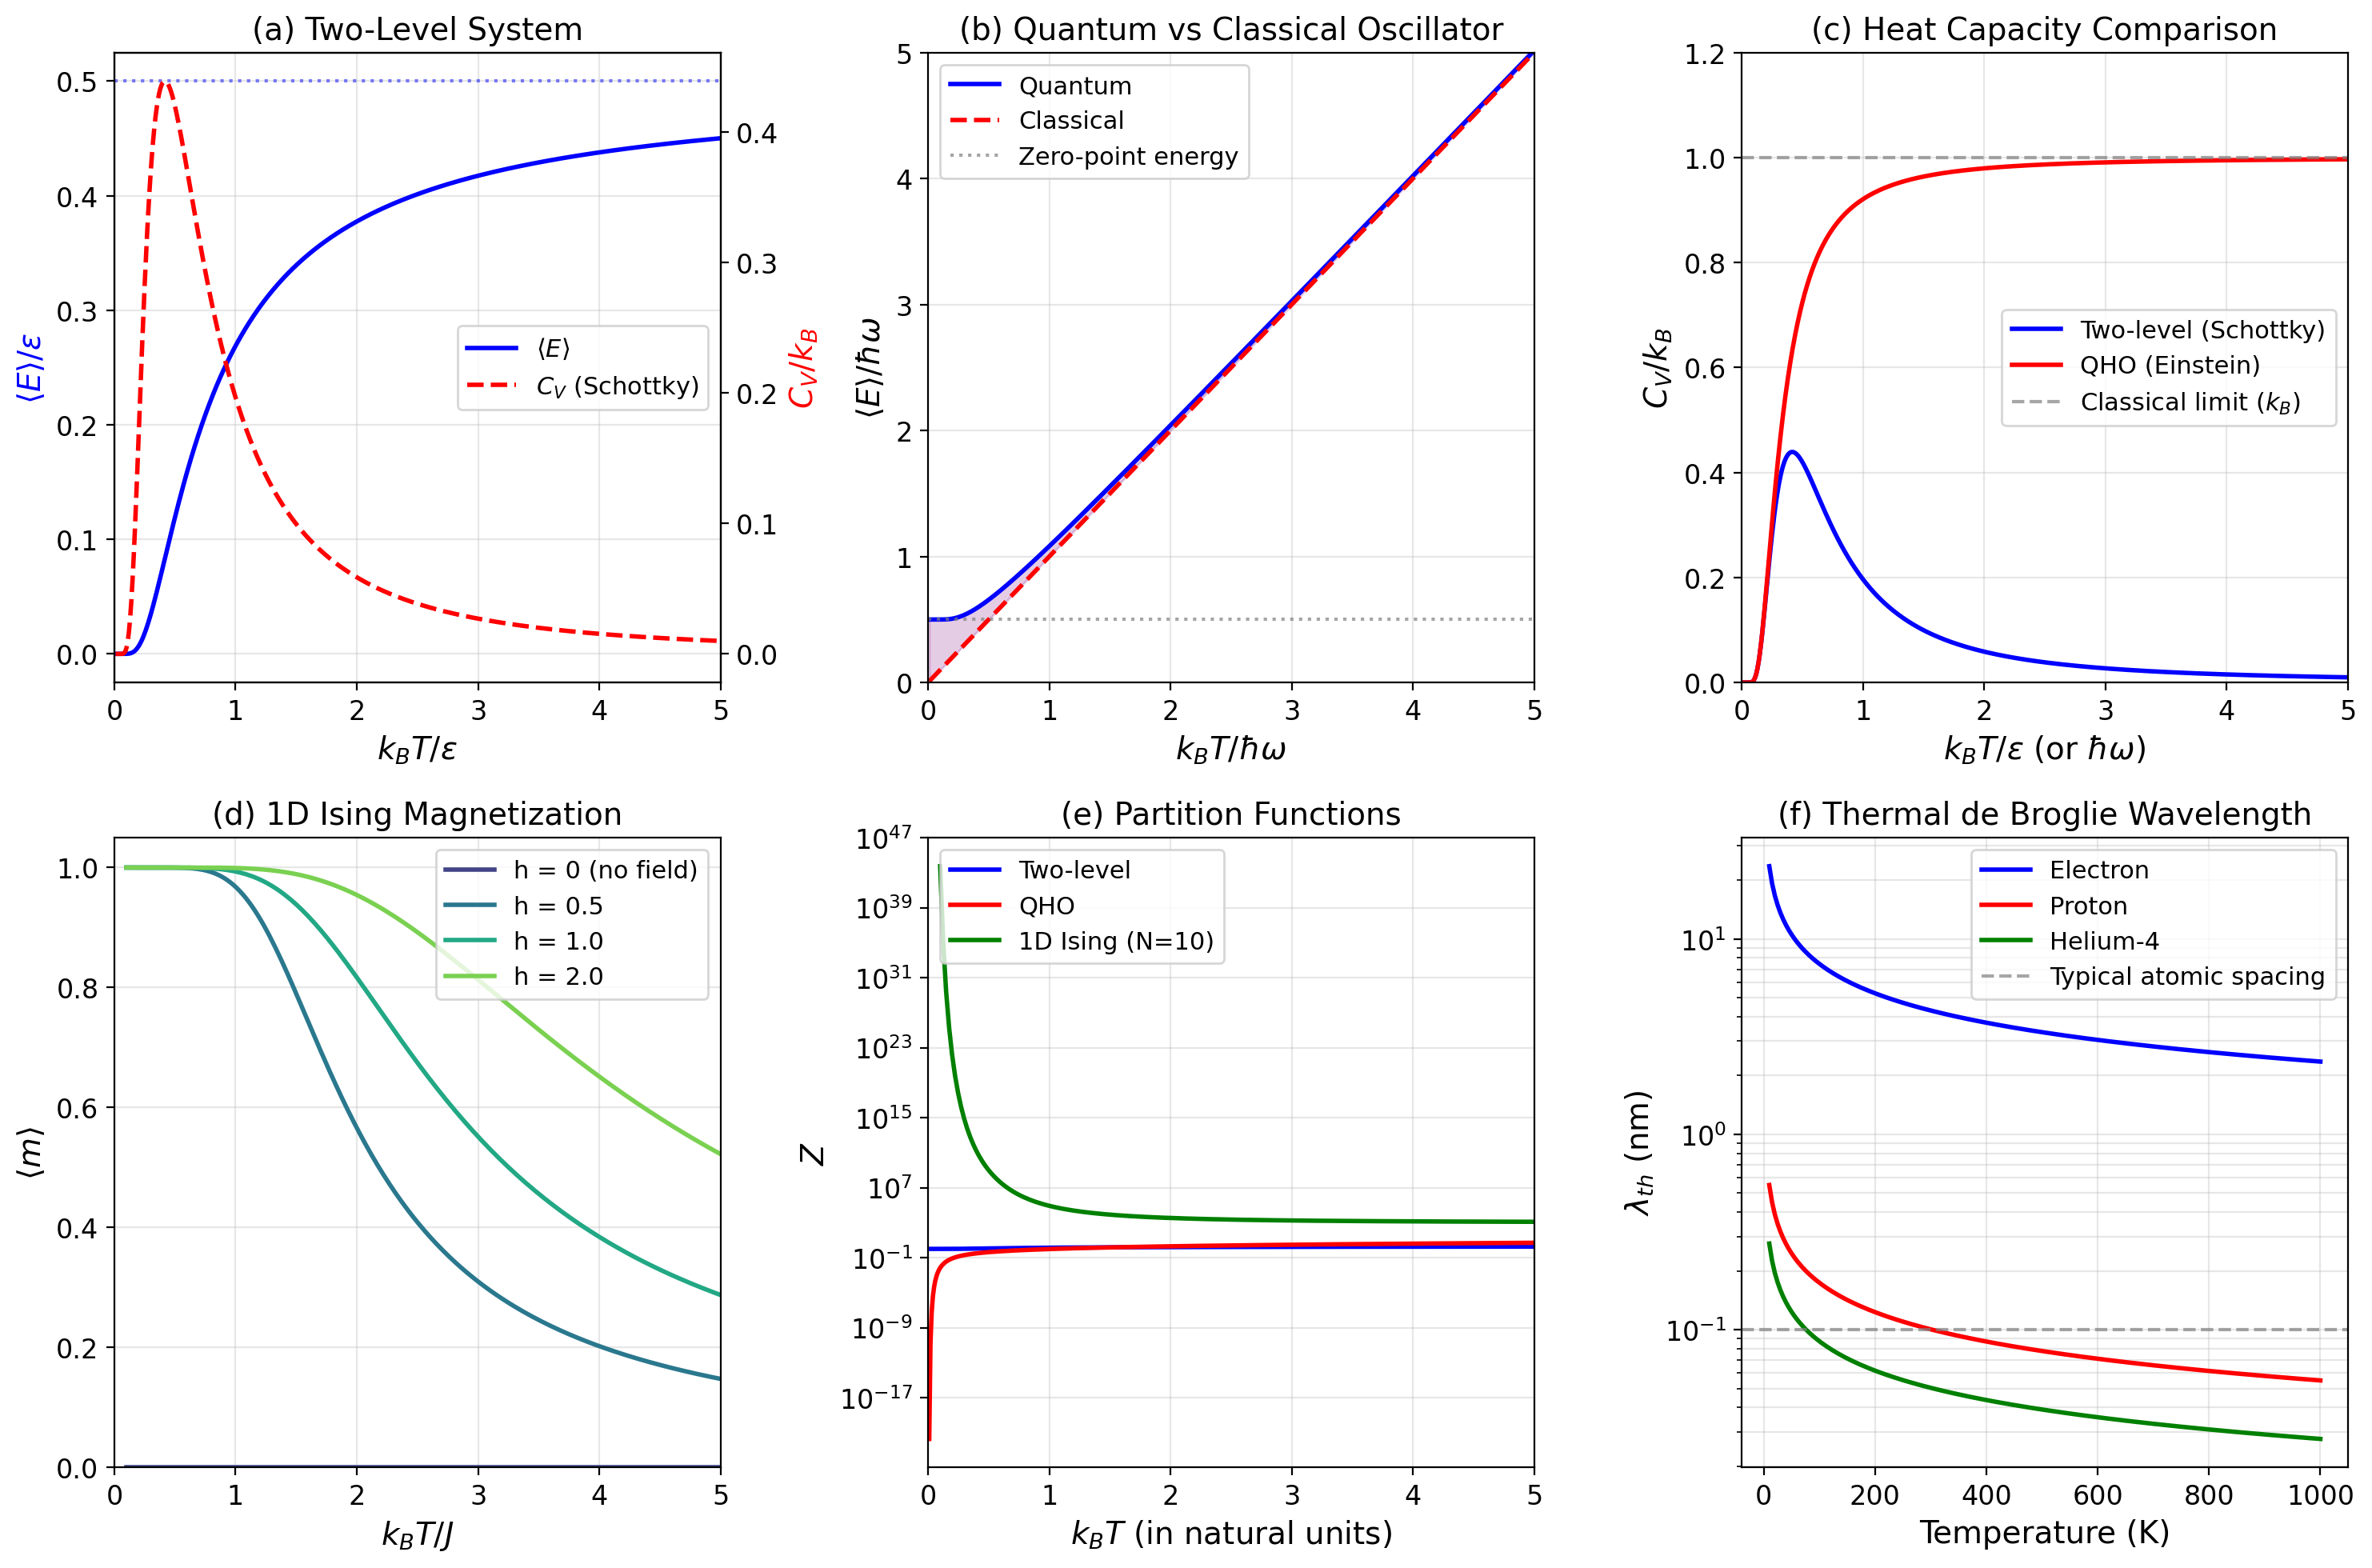


Figure saved to 'plot.png'


In [6]:
# Create comprehensive figure
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Panel (a): Two-level system - Energy and Heat Capacity
ax1 = axes[0, 0]
ax1_twin = ax1.twinx()
line1, = ax1.plot(T, E_two, 'b-', linewidth=2, label=r'$\langle E \rangle$')
line2, = ax1_twin.plot(T, C_two, 'r--', linewidth=2, label=r'$C_V$ (Schottky)')
ax1.axhline(y=epsilon/2, color='b', linestyle=':', alpha=0.5, label=r'$\varepsilon/2$ (high-T limit)')
ax1.set_xlabel(r'$k_B T / \varepsilon$')
ax1.set_ylabel(r'$\langle E \rangle / \varepsilon$', color='b')
ax1_twin.set_ylabel(r'$C_V / k_B$', color='r')
ax1.set_title('(a) Two-Level System')
ax1.set_xlim(0, 5)
ax1.legend(handles=[line1, line2], loc='right')
ax1.grid(True, alpha=0.3)

# Panel (b): Quantum vs Classical Harmonic Oscillator
ax2 = axes[0, 1]
ax2.plot(T_qho, E_qho, 'b-', linewidth=2, label='Quantum')
ax2.plot(T_qho, E_classical, 'r--', linewidth=2, label='Classical')
ax2.axhline(y=hbar_omega/2, color='gray', linestyle=':', alpha=0.7, label='Zero-point energy')
ax2.fill_between(T_qho, E_qho, E_classical, alpha=0.2, color='purple')
ax2.set_xlabel(r'$k_B T / \hbar\omega$')
ax2.set_ylabel(r'$\langle E \rangle / \hbar\omega$')
ax2.set_title('(b) Quantum vs Classical Oscillator')
ax2.set_xlim(0, 5)
ax2.set_ylim(0, 5)
ax2.legend(loc='upper left')
ax2.grid(True, alpha=0.3)

# Panel (c): Heat Capacity Comparison
ax3 = axes[0, 2]
ax3.plot(T, C_two, 'b-', linewidth=2, label='Two-level (Schottky)')
ax3.plot(T_qho, C_qho, 'r-', linewidth=2, label='QHO (Einstein)')
ax3.axhline(y=1, color='gray', linestyle='--', alpha=0.7, label=r'Classical limit ($k_B$)')
ax3.set_xlabel(r'$k_B T / \varepsilon$ (or $\hbar\omega$)')
ax3.set_ylabel(r'$C_V / k_B$')
ax3.set_title('(c) Heat Capacity Comparison')
ax3.set_xlim(0, 5)
ax3.set_ylim(0, 1.2)
ax3.legend(loc='right')
ax3.grid(True, alpha=0.3)

# Panel (d): Ising Model Magnetization
ax4 = axes[1, 0]
colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(h_values)))
for idx, h_val in enumerate(h_values):
    label = f'h = {h_val}' if h_val > 0 else 'h = 0 (no field)'
    ax4.plot(T_ising, magnetizations[h_val], color=colors[idx], linewidth=2, label=label)
ax4.set_xlabel(r'$k_B T / J$')
ax4.set_ylabel(r'$\langle m \rangle$')
ax4.set_title('(d) 1D Ising Magnetization')
ax4.set_xlim(0, 5)
ax4.set_ylim(0, 1.05)
ax4.legend(loc='upper right')
ax4.grid(True, alpha=0.3)

# Panel (e): Partition Function vs Temperature (log scale)
# For Ising model, use free energy per spin to avoid overflow with large N
ax5 = axes[1, 1]
ax5.semilogy(T, Z_two, 'b-', linewidth=2, label='Two-level')
ax5.semilogy(T_qho, Z_qho, 'r-', linewidth=2, label='QHO')
# For Ising, compute Z for small N to avoid overflow
N_plot = 10  # Small N for plotting partition function
Z_ising_plot = np.array([ising_1d_partition_function(N_plot, b, J, 0.0) for b in beta_ising])
ax5.semilogy(T_ising, Z_ising_plot, 'g-', linewidth=2, label=f'1D Ising (N={N_plot})')
ax5.set_xlabel(r'$k_B T$ (in natural units)')
ax5.set_ylabel(r'$Z$')
ax5.set_title('(e) Partition Functions')
ax5.set_xlim(0, 5)
ax5.legend(loc='upper left')
ax5.grid(True, alpha=0.3, which='both')

# Panel (f): Thermal de Broglie wavelength
ax6 = axes[1, 2]
# Different particles
m_electron = constants.electron_mass
m_proton = constants.proton_mass
m_helium = 4 * constants.atomic_mass

T_gas = np.linspace(10, 1000, 200)
lambda_e = thermal_wavelength(T_gas, m_electron) * 1e9  # Convert to nm
lambda_p = thermal_wavelength(T_gas, m_proton) * 1e9
lambda_He = thermal_wavelength(T_gas, m_helium) * 1e9

ax6.semilogy(T_gas, lambda_e, 'b-', linewidth=2, label='Electron')
ax6.semilogy(T_gas, lambda_p, 'r-', linewidth=2, label='Proton')
ax6.semilogy(T_gas, lambda_He, 'g-', linewidth=2, label='Helium-4')
ax6.axhline(y=0.1, color='gray', linestyle='--', alpha=0.7, label='Typical atomic spacing')
ax6.set_xlabel('Temperature (K)')
ax6.set_ylabel(r'$\lambda_{th}$ (nm)')
ax6.set_title('(f) Thermal de Broglie Wavelength')
ax6.legend(loc='upper right')
ax6.grid(True, alpha=0.3, which='both')

plt.tight_layout()
plt.savefig('partition_function_calculation_analysis.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

print("\nFigure saved to 'plot.png'")

## Summary and Key Results

### Key Takeaways

1. **Partition Function as Generating Function**: The partition function $Z = \sum_i e^{-\beta E_i}$ contains all equilibrium thermodynamic information. Derivatives of $\ln Z$ yield averages:
   - $\langle E \rangle = -\partial_{\beta} \ln Z$
   - $\langle E^2 \rangle - \langle E \rangle^2 = \partial_{\beta}^2 \ln Z$

2. **Two-Level System**: Exhibits the **Schottky anomaly** - a peak in heat capacity at $T \approx 0.42\varepsilon/k_B$, characteristic of systems with a finite number of states.

3. **Quantum Harmonic Oscillator**: Demonstrates the transition from quantum ($k_B T \ll \hbar\omega$) to classical ($k_B T \gg \hbar\omega$) behavior, with the characteristic zero-point energy $\hbar\omega/2$.

4. **1D Ising Model**: Exactly solvable via the transfer matrix method. No phase transition at finite temperature (consistent with the Mermin-Wagner theorem for 1D systems with short-range interactions).

5. **Ideal Gas**: The partition function naturally produces the ideal gas law $PV = Nk_BT$ and reveals when quantum effects become important (when $\lambda_{th} \sim$ interparticle spacing).

### Computational Methods

- **Analytical solutions** are preferred when available (two-level, QHO, 1D Ising)
- **Direct enumeration** works for small systems ($N \lesssim 20-25$ for exact enumeration)
- **Monte Carlo methods** (not covered here) are essential for larger systems and higher dimensions

In [7]:
# Final verification: print key results
print("="*60)
print("PARTITION FUNCTION CALCULATION - KEY NUMERICAL RESULTS")
print("="*60)

print("\n1. TWO-LEVEL SYSTEM (ε = 1)")
print("-" * 40)
T_test = [0.5, 1.0, 2.0]
for T_val in T_test:
    beta_val = 1/T_val
    Z_val = two_level_partition_function(beta_val, 1.0)
    E_val = two_level_average_energy(beta_val, 1.0)
    C_val = two_level_heat_capacity(beta_val, 1.0)
    print(f"  T = {T_val:.1f}: Z = {Z_val:.4f}, ⟨E⟩ = {E_val:.4f}, C_V = {C_val:.4f}")

print("\n2. QUANTUM HARMONIC OSCILLATOR (ℏω = 1)")
print("-" * 40)
for T_val in T_test:
    beta_val = 1/T_val
    Z_val = qho_partition_function(beta_val, 1.0)
    E_val = qho_average_energy(beta_val, 1.0)
    C_val = qho_heat_capacity(beta_val, 1.0)
    print(f"  T = {T_val:.1f}: Z = {Z_val:.4f}, ⟨E⟩ = {E_val:.4f}, C_V = {C_val:.4f}")

print("\n3. 1D ISING MODEL (J = 1, N = 100)")
print("-" * 40)
for T_val in T_test:
    beta_val = 1/T_val
    F_val = ising_1d_free_energy_per_spin(100, beta_val, 1.0, 0)
    m_val = ising_1d_magnetization(beta_val, 1.0, 0.5)
    print(f"  T = {T_val:.1f}: F/N = {F_val:.4f}, m(h=0.5) = {m_val:.4f}")

print("\n" + "="*60)
print("Notebook completed successfully.")
print("="*60)

PARTITION FUNCTION CALCULATION - KEY NUMERICAL RESULTS

1. TWO-LEVEL SYSTEM (ε = 1)
----------------------------------------
  T = 0.5: Z = 1.1353, ⟨E⟩ = 0.1192, C_V = 0.4200
  T = 1.0: Z = 1.3679, ⟨E⟩ = 0.2689, C_V = 0.1966
  T = 2.0: Z = 1.6065, ⟨E⟩ = 0.3775, C_V = 0.0588

2. QUANTUM HARMONIC OSCILLATOR (ℏω = 1)
----------------------------------------
  T = 0.5: Z = 0.4255, ⟨E⟩ = 0.6565, C_V = 0.7241
  T = 1.0: Z = 0.9595, ⟨E⟩ = 1.0820, C_V = 0.9207
  T = 2.0: Z = 1.9793, ⟨E⟩ = 2.0415, C_V = 0.9794

3. 1D ISING MODEL (J = 1, N = 100)
----------------------------------------
  T = 0.5: F/N = -1.0091, m(h=0.5) = 0.9999
  T = 1.0: F/N = -1.1269, m(h=0.5) = 0.9679
  T = 2.0: F/N = -1.6265, m(h=0.5) = 0.5661

Notebook completed successfully.
